# Data Augmentation

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Creating an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,      # Random rotation by up to 40 degrees
    width_shift_range=0.2,   # Random horizontal shift by up to 20% of the width
    height_shift_range=0.2,  # Random vertical shift by up to 20% of the height
    shear_range=0.2,         # Shear transformation by up to 20 degrees
    zoom_range=0.2,          # Random zoom by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    vertical_flip=True,      # Randomly flip images vertically
    fill_mode='nearest'      # Fill any empty pixels after rotation or shift
)

Using the datagen instance to generate augmented batches of images during training.

In [5]:
# Paths to your splitted datasets
train_dir = r"C:\Users\mzowe\Documents\SSSDataSets\ImageCNN\SplittedProductDataSets\train"
validation_dir = r"C:\Users\mzowe\Documents\SSSDataSets\ImageCNN\SplittedProductDataSets\validation"
test_dir = r"C:\Users\mzowe\Documents\SSSDataSets\ImageCNN\SplittedProductDataSets\test"

# Image dimensions
target_size = (224, 224)

# Batch size
batch_size = 30

# Create data generators for training, validation, and test sets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 758 images belonging to 33 classes.
Found 218 images belonging to 33 classes.
Found 173 images belonging to 33 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy  # Import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping
from tensorflow.keras.initializers import VarianceScaling

# Create the VarianceScaling initializer with dtype argument
variance_scaling_initializer = VarianceScaling(dtype='float32')

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_initializer=variance_scaling_initializer),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=variance_scaling_initializer),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', kernel_initializer=variance_scaling_initializer),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu', kernel_initializer=variance_scaling_initializer),
    Dropout(0.5),
    
    Dense(33, activation='softmax', kernel_initializer=variance_scaling_initializer)  # 33 classes for your products
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=[CategoricalAccuracy()])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Number of steps per epoch (total_training_samples / batch_size)
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

# Print the loss during training
print("Training Losses:")
print(history.history['loss'])

# Print the validation loss during training
print("Validation Losses:")
print(history.history['val_loss'])

Epoch 1/30


In [7]:
import matplotlib.pyplot as plt

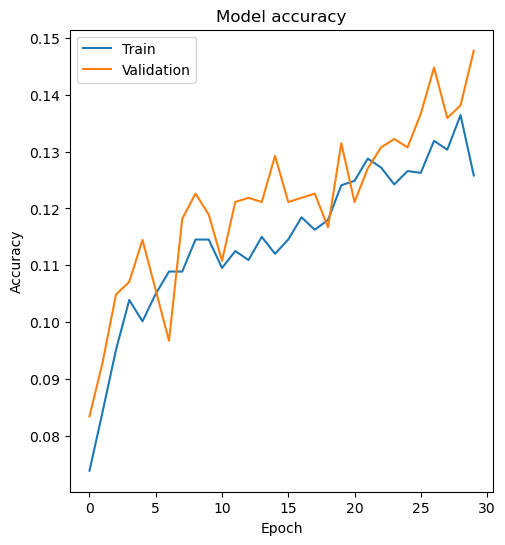

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

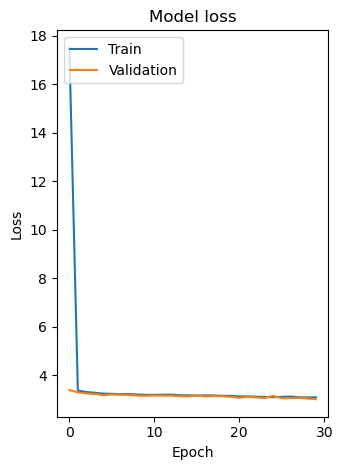

In [9]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

In [12]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import os

1/1 [==============================] - 0s 38ms/step


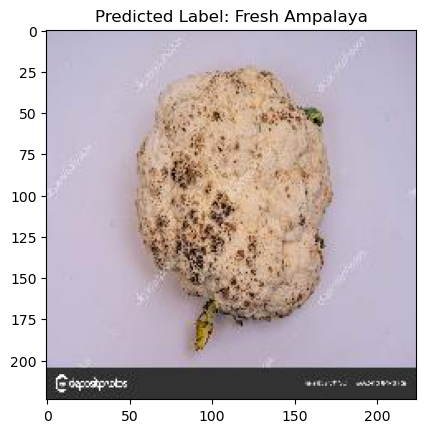

In [16]:
# Get a random class (subdirectory) from the testing set
random_class = random.choice(os.listdir(test_dir))

# Get a random image from the selected class
random_image_name = random.choice(os.listdir(os.path.join(test_dir, random_class)))
random_image_path = os.path.join(test_dir, random_class, random_image_name)

# Load and preprocess the test image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

test_image = load_and_preprocess_image(random_image_path)

# Get the predicted probabilities for each class
predictions = model.predict(test_image)

# Get the class labels (assuming `class_names` contains your class names)
class_names = os.listdir("C:\\Users\\John Michael\\Documents\\SplittedFvDatasets\\train")

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index]

# Display the test image along with the predicted label
plt.imshow(image.load_img(random_image_path, target_size=(224, 224)))
plt.title(f'Predicted Label: {predicted_class_label}')
plt.show()